## Крайников Иван Александрович РТ5-61Б, Вариант 11
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import math
%matplotlib inline

df = pd.read_csv("toy_dataset.csv")
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [2]:
df.shape

(150000, 6)

In [3]:
df.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

In [4]:
df.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

Пропуски отсутствуют

Заполним 10 значений признаков Gender и Age, категориального и количественного признака соответственно, NaN и проверим на наличие пропусков

In [5]:
import pandas as pd
import numpy as np

random_gender_indices = np.random.choice(df.index, size=10, replace=False)
df.loc[random_gender_indices, 'Gender'] = np.nan

random_age_indices = np.random.choice(df.index, size=10, replace=False)
df.loc[random_age_indices, 'Age'] = np.nan

In [6]:
df['Gender'].isnull().sum()

10

In [7]:
df['Age'].isnull().sum()

10

Обработаем пропуски в категориальном признаке Gender через моду

In [8]:
tmp = pd.Series(df['Gender'].copy())

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

changed_rows = tmp.compare(df['Gender'])

C:\Users\cry1s\AppData\Local\Temp\ipykernel_14968\3744770645.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [9]:
changed_rows

,self,other
32655,NaN,Male
37564,NaN,Male
38821,NaN,Male
43432,NaN,Male
43532,NaN,Male
105924,NaN,Male
105999,NaN,Male
111646,NaN,Male
119705,NaN,Male
146157,NaN,Male


In [10]:
tmp = pd.Series(df['Age'].copy())

df['Age'].fillna(df['Age'].median(), inplace=True)

changed_rows = tmp.compare(df['Age'])

C:\Users\cry1s\AppData\Local\Temp\ipykernel_14968\337877799.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [11]:
changed_rows

,self,other
6655,NaN,45.0
26029,NaN,45.0
29362,NaN,45.0
58213,NaN,45.0
58485,NaN,45.0
60641,NaN,45.0
66117,NaN,45.0
68881,NaN,45.0
71962,NaN,45.0
110498,NaN,45.0


Проверим заполнение

In [12]:
df['Gender'].isnull().sum()

0

In [13]:
df['Age'].isnull().sum()

0

Построим Violin plot для поля age

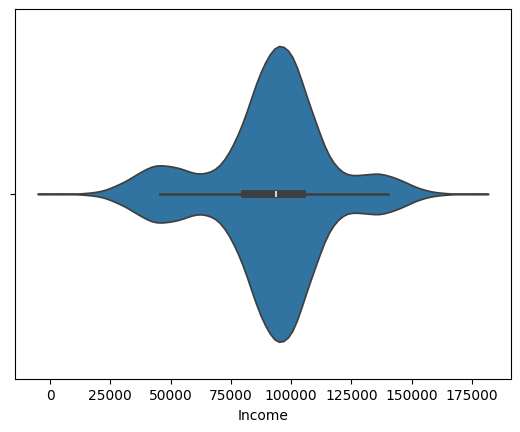

In [14]:
import seaborn as sns

sns.violinplot(data=df, x="Income")

plt.show()

Для дальнейшего построения модели машинного обучения следует учитывать такие аспекты, как:

- Статистические свойства
- Важность признака
- Корреляция с целевой переменной